# Pitfalls of the Markowitz procedure and the GMV portfolio

In [3]:
import Finance_Risk_Toolkit as FRT
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Industry_returns = FRT.get_ind_returns()
er = FRT.annualize_rets(Industry_returns["1996":"2000"], 12)
cov = Industry_returns["1996":"2000"].cov()

Let's look at a simple 2-asset portfolio and find the optimal weights if we had known what the returns would be.

In [11]:
l = ["Food", "Steel"]
import numpy as np
FRT.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

Let's look at the returns of the two assets that dictated those weights

In [5]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Lets explore loopholes now!

In [12]:
FRT.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [13]:
FRT.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [14]:
FRT.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

# Avoiding estimating returns

Let's look at the efficient frontier one more time, and plot the efficient frontier again.

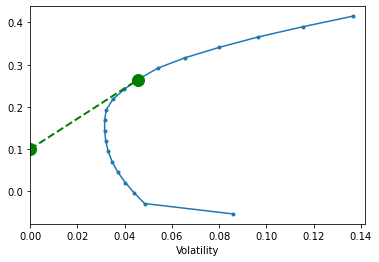

In [15]:
FRT.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

One way to avoid this estimation game is to skip the entire process and just rely on naive diversification, which means hold all stocks with equal weight. We can add the EW portfolio to the plot.

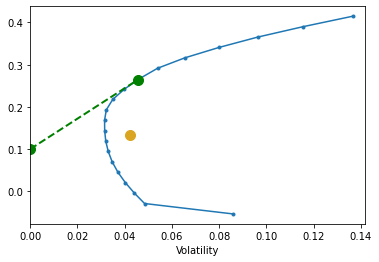

In [16]:
FRT.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

GMV Portfolio is considered a far better portfolio tan one above. GMV portfolio is portfolio of lowest volatility across all possible portfolios.

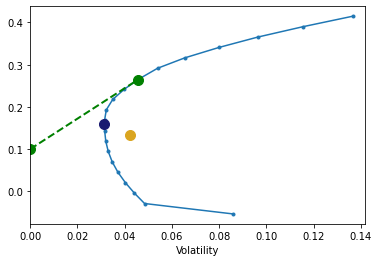

In [17]:
FRT.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)